# Corner

In [1]:
import cv2 as cv, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
import imutils
import qrcode
import pyqrcode
from PIL import Image
import pyzbar
from pyzbar.pyzbar import decode
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
# def create_win(frames, scale=1.0) :    
#     global myImage
    
#     all = []
#     for f in frames :
#         if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
#         all.append(f)
#     frame = np.vstack(all)
    
#     fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
#     fr=cv2.flip(fr, -1) # because Bokeh flips vertically
#     width=fr.shape[1]
#     height=fr.shape[0]    

#     p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
#     myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
#     show(p, notebook_handle=True)   
    
    
# def update_win(frames) :
    
#     all = []
#     for f in frames :
#         if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
#         all.append(f)
#     frame = np.vstack(all)
    
#     fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
#     fr=cv2.flip(fr, -1)
#     myImage.data_source.data['image']=[fr]
#     push_notebook()
#     time.sleep(0.05)

Loading BokehJS ...

In [56]:
src = cv.imread('building.jpg',0)# MREAD_GRAYSCALE = 0
# src = cv.imread('chessboard.jpg',cv.IMREAD_GRAYSCALE)
# src = cv.imread('corner.png',0)

harris = cv.cornerHarris(gauss,3,3,0.04)#corner를 확인하는 block size 3*3 , sobel filter 크기, k=0.04~0.06
print(harris.dtype)
print(harris.shape)

float32
(480, 640)


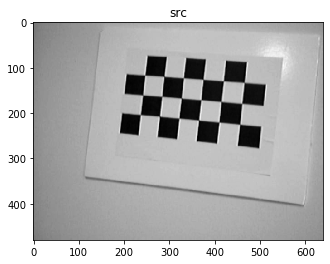

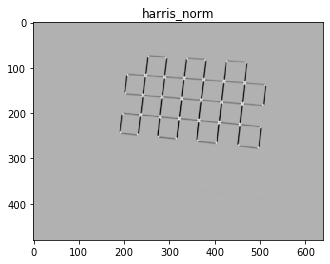

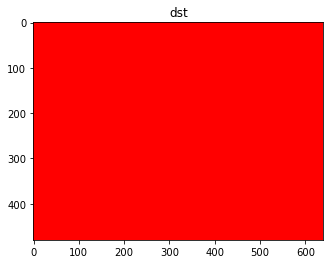

In [41]:
harris_norm = cv.normalize(harris, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

dst = cv.cvtColor(src, cv.COLOR_GRAY2BGR)

# for y in range(harris_norm.shape[0]):
#         for x in range(harris_norm.shape[1]):
#             if harris_norm[y, x] > 128:
#                     cv.circle(dst, (x, y), 5, (0, 0, 255), 2)#


imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

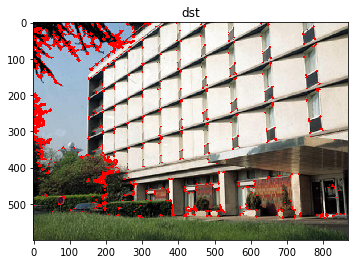

In [59]:
gray = cv.imread('building.jpg',0)
img = cv.imread('building.jpg')
dst = cv.cornerHarris(gray, 3, 3, 0.04)
img[dst>0.01*dst.max()]=[0,0,255]#BGR
imshow('dst',img)

In [53]:
a = np.array([[1,2,4],[7,0,1]])
print(a)
b = a > 3
print(b)
a[b] = 100
print(a)

[[1 2 4]
 [7 0 1]]
[[False False  True]
 [ True False False]]
[[  1   2 100]
 [100   0   1]]


In [9]:
# src = cv.imread('building.jpg',cv.IMREAD_GRAYSCALE)
src = cv.imread('chessboard.jpg',cv.IMREAD_GRAYSCALE)
gauss = cv.GaussianBlur(src,(25,25),0)
harris = cv.cornerHarris(gauss,3,3,0.04)#corner를 확인하는 block size 3*3 , sobel filter 크기, k=0.04~0.06
print(harris.dtype)
print(harris.shape)

float32
(480, 640)


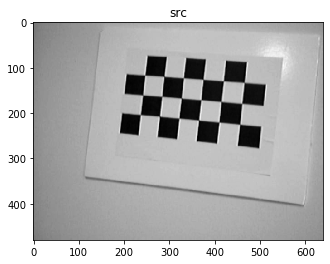

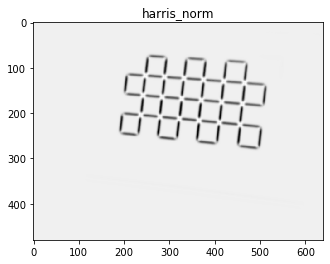

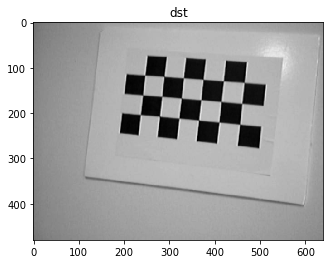

In [48]:
harris_norm = cv.normalize(harris, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

dst = cv.cvtColor(src, cv.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 128:
                    cv.circle(dst, (x, y), 5, (0, 0, 255), 2)
#영상이 크면 클수록 python에서 for문을 사용하면 엄청 느려짐 가급적 for문 사용 X
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

35
(21.0, 33.0)


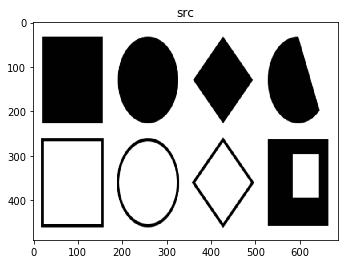

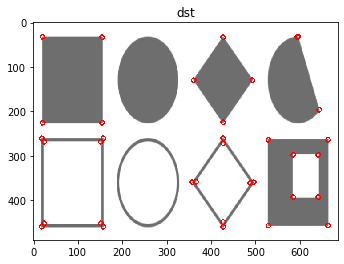

In [76]:
src2 = cv.imread('corner.png',0)

fast = cv.FastFeatureDetector_create(50) #harris corner보다 빠름
keypoints = fast.detect(src2)
print(len(keypoints))

print(keypoints[0].pt)
x,y= keypoints[0].pt
dst = cv.cvtColor(src,cv.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]),int(kp.pt[1]))
    cv.circle(dst,pt,5,(0,0,255),2) #pt integer 값이어야 함.

imshow('src',src2)
imshow('dst',dst)
# imshow('src',src)


(480, 640, 3)


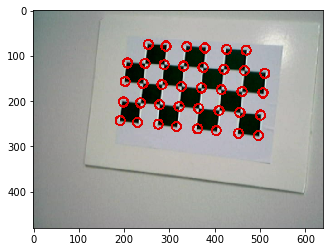

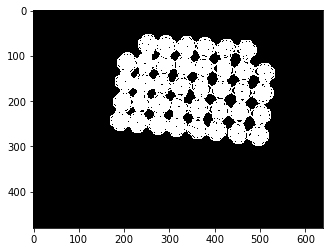

In [14]:
mask = np.zeros(src.shape,dtype='uint8')#default값은 uint8이 아님.

print(mask.shape)
fast = cv.FastFeatureDetector_create(50) #harris corner보다 빠름
keypoints = fast.detect(src)
for kp in keypoints:
    pt = (int(kp.pt[0]),int(kp.pt[1]))
    cv.circle(mask,pt,10,(255,255,255),2)

imshow('',src)
imshow('',mask)

In [12]:
contours,_ = cv.findContours(mask,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

38


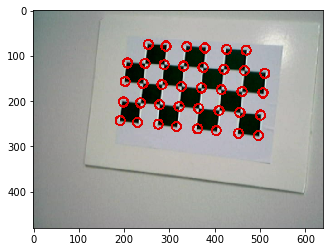

38


In [15]:
src = cv.imread('chessboard.jpg')
points=[]
for con in contours :
    M = cv.moments(con,True)
    cx = int(M['m10']/M['m00'])#m00  전체 값 m10  x값의 합
    cy = int(M['m01']/M['m00'])#m00  전체 값 m01  y값의 합
    cv.circle(src,(cx,cy),10,(0,0,225),3)
    points.append([cx,cy])
imshow('',src)
print(len(points))#before sort set lambda

0


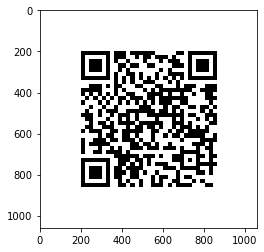

In [14]:
src = cv.imread('acronet.png')
gray =cv.imread('acronet.png',0)

fast = cv.FastFeatureDetector_create(50) #harris corner보다 빠름
keypoints = fast.detect(src)
print(len(keypoints))
for kp in keypoints:
    pt = (int(kp.pt[0]),int(kp.pt[1]))
    cv.circle(src,pt,5,(0,0,255),2)
imshow('',src)

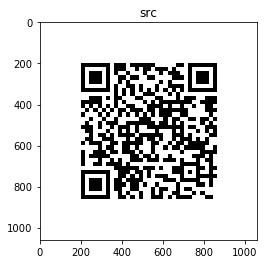

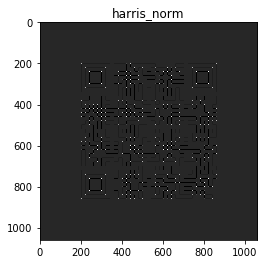

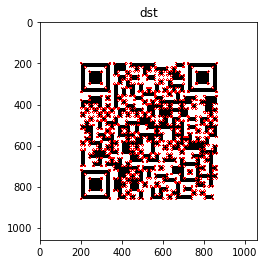

In [16]:
gray =cv.imread('acronet.png',0)
harris = cv.cornerHarris(gray,3,3,0.04)
harris_norm = cv.normalize(harris, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

dst = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv.circle(dst, (x, y), 5, (0, 0, 255), 2)
#영상이 크면 클수록 python에서 for문을 사용하면 엄청 느려짐 가급적 for문 사용 X
imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

harris_norm image에서 
corner점을 직접적으로 찾는것
배경이 복잡하면 복잡할수록 edge를 통해 찾기 어려워짐

## QR Code

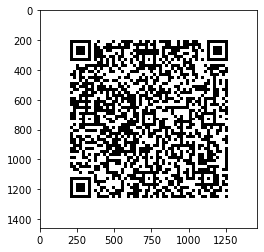

In [28]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 20,
     border = 10)

url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8'
qr.add_data(url)
qr.make()

img = qr.make_image(fill_color="black", back_color="white")

plt.imshow(img, cmap="gray")

img.save("qrcode.png")

img = cv.imread("qrcode.png")
# img = np.hstack([img, img, img])
imshow("", img)

https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8


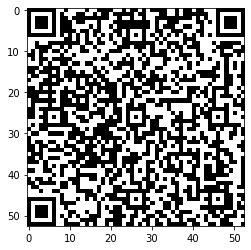

'https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8'

In [30]:
image = cv.imread('qrcode.png')
qrDecoder = cv.QRCodeDetector()
data,bbox,rectifiedImage = qrDecoder.detectAndDecode(image)

print(data)
imshow('',rectifiedImage)
data

[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

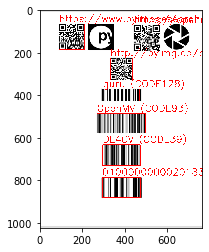

In [7]:
image = cv.imread('barqr.jpg')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv.putText(image, text, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

ORB

desc1.shape: (453, 32)
desc2.shape: (500, 32)


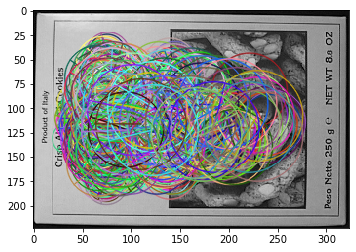

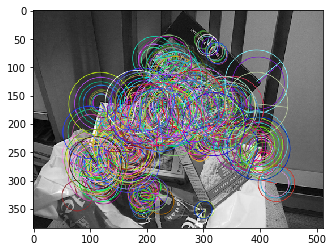

In [44]:
src1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)
src2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE)
# src = cv.imread('corner.png',cv.IMREAD_GRAYSCALE)
orb = cv.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1,None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

print('desc1.shape:',desc1.shape)
print('desc2.shape:',desc2.shape)# 점 하나하나 descriptor 32byte


# keypoints = keypoints[0]#keypoint는 그냥 list로 생각하고 있어라

dst1 = cv.drawKeypoints(src1, keypoints1, None, (-1,-1,-1),cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv.drawKeypoints(src2, keypoints2, None, (-1,-1,-1),cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

#corner점의 scale과 방향에 대한 두가지 정보를 갖고 있다.
imshow('',dst1)
imshow('',dst2)


In [49]:
print(type(keypoints))
print(keypoints1[171].pt)
print(desc1[171])

print(keypoints2[171].pt)
print(desc2[171]) # 두점은 완전히 다르다는 것을 알 수 있다.

<class 'cv2.KeyPoint'>
(56.400001525878906, 134.40000915527344)
[103 153 226  94 193 208  86 176 121  66 254  18 106 254  46 116  93 250
 182 194 221  47 246 227  19  62 144  75 127 173 248  70]
(121.20000457763672, 297.6000061035156)
[169  30  14  49 184 251 145 119 188 239 246 253 159   6 130 153 206  34
 206  52 189 207  97  12 236 195 122 209 202  76 175 217]


453


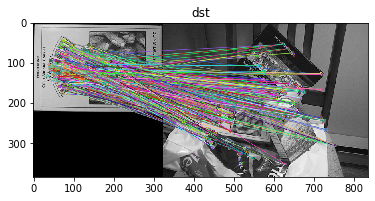

True

In [50]:
matcher = cv.BFMatcher_create(cv.NORM_HAMMING)#matcher 알고리즘
matches = matcher.match(desc1,desc2)#desc1과 desc2의 matching 정보 포함
#matcher.match는 list 객체
print(len(matches))# 일대일로 matching된다.

dst = cv.drawMatches(src1,keypoints1,src2,keypoints2,matches,None)
imshow('dst',dst)
cv.imwrite('orb.png',dst)

In [ ]:
print(keypoints1[matches[0].queryIdx].pt)
print(keypoints2[matches[0].trainIdx].pt)
for m in matches:
    print(f'{m.queryIdx} -> {m.trainIdx}, {m.distance}')

(141.00482177734375, 155.52001953125)
(171.60000610351562, 246.00001525878906)


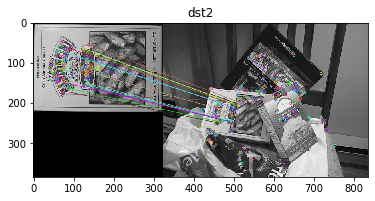

True

In [59]:
matches = sorted(matches,key=lambda x: x.distance)
good_matches=matches[:20]

dst2 = cv.drawMatches(src1,keypoints1,src2,keypoints2,good_matches,None)
imshow('dst2',dst2)
cv.imwrite('orb2.png',dst2)

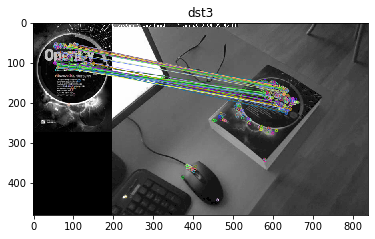

True

In [75]:
src3 = cv.imread('book3.jpg',cv.IMREAD_GRAYSCALE)
src4 = cv.imread('book3_1.jpg',cv.IMREAD_GRAYSCALE)

orb = cv.ORB_create()
keypoints3, desc3 = orb.detectAndCompute(src3,None)
keypoints4, desc4 = orb.detectAndCompute(src4, None)

dst3 = cv.drawKeypoints(src3, keypoints3, None, (-1,-1,-1),
                        cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst4 = cv.drawKeypoints(src4, keypoints4, None, (-1,-1,-1),
                        cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

matcher = cv.BFMatcher_create(cv.NORM_HAMMING)#matcher 알고리즘
matches2 = matcher.match(desc3,desc4)

dst3 = cv.drawMatches(src3,keypoints3,src4,keypoints4,matches2,None)

matches2 = sorted(matches2,key=lambda x: x.distance)
good_matches=matches2[:50]

dst3 = cv.drawMatches(src3,keypoints3,src4,keypoints4,good_matches,None)
imshow('dst3',dst3)
cv.imwrite('orb3.png',dst3)

In [ ]:
files =['img1.jpg','img2.jpg','img3.jpg']
imgs=[]
for file in files:
    img = cv.imread(file)
    imgs.append(img)
    
stitcher = cv.Stitcher_create()
status, dst = stitcher.stitch(imgs)
cv.imwrite('result.jpg',dst)
imshow('dst',dst)

In [2]:
files =['Left.jpeg','Right.jpeg']
imgs=[]
for file in files:
    img = cv.imread(file)
    imgs.append(img)

In [ ]:
 
stitcher = cv.Stitcher_create()
status, dst = stitcher.stitch(imgs)
cv.imwrite('result.jpg',dst)
imshow('dst',dst)